In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

url_df_raw = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/RAW/df_raw.csv"
url_df_clean_v1 = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/df_procesado_genderandage.csv"
url_df45_conoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Con_outliers/df_v45.csv'
url_df45_sinoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Sin_outliers/df_v45sinoutliers.csv'
#df = pd.read_csv(url_df_clean_v1)
#df = df.drop(['Unnamed: 0'], axis = 1)
df_raw = pd.read_csv(url_df_raw)
dfo = pd.read_csv(url_df45_conoutliers)
df = pd.read_csv(url_df45_sinoutliers)


In [ ]:
dfo = dfo.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.isna().sum()

Unnamed: 0         0
SEQN               0
DIQ010             0
DIQ070             0
INQ020             0
INDFMMPI           0
INDFMMPC           0
BPXSY1             0
BPXDI1             0
BMXWT              0
BMXHT              0
BMXBMI             0
BMXWAIST           0
BPQ030             0
BPQ040A            0
BPQ050A            0
BPQ090D            0
LBXGLU             0
LBXIN              0
MCQ010             0
MCQ080             0
MCQ220             0
MCQ300C            0
HIQ011             0
LBDHDD             0
SMQ020             0
LBXTR              0
RIAGENDR           0
RIDAGEYR           0
RIDRETH3           0
DMDEDUC2           0
PAQ605             0
PAQ620             0
PAQ635             0
PAQ650             0
PAQ665             0
HSD010             0
ALQ130             0
DBQ700             0
SLQ050             0
DPQ020             0
DPQ030             0
DPQ040             0
DPQ050             0
RIDAGEYR_Tramos    0
Etnia_1.0          0
Etnia_2.0          0
Etnia_3.0    

#LIMPIEZA DEFINITIVA


In [ ]:
#GRUPOS POR EDAD
df['RIDAGEYR'].describe()

df.loc[(df['RIDAGEYR'] <= 5) & (df['RIDAGEYR'] >= 1), 'RIDAGEYR_Tramos'] = int(1)
df.loc[(df['RIDAGEYR'] <= 12) & (df['RIDAGEYR'] >= 5), 'RIDAGEYR_Tramos'] = int(2)
df.loc[(df['RIDAGEYR'] <= 20) & (df['RIDAGEYR'] > 12), 'RIDAGEYR_Tramos'] = int(3)
df.loc[(df['RIDAGEYR'] <= 35) & (df['RIDAGEYR'] > 20), 'RIDAGEYR_Tramos'] = int(4)
df.loc[(df['RIDAGEYR'] <= 50) & (df['RIDAGEYR'] > 35), 'RIDAGEYR_Tramos'] = int(5)
df.loc[(df['RIDAGEYR'] <= 65) & (df['RIDAGEYR'] > 50), 'RIDAGEYR_Tramos'] = int(6)
df.loc[(df['RIDAGEYR'] <= 80) & (df['RIDAGEYR'] > 65), 'RIDAGEYR_Tramos'] = int(7)

#dataset por male y female
df_male = df[df['RIAGENDR']==1]
df_female = df[df['RIAGENDR']==2]




df.loc[(df['RIDAGEYR'] <= 5) & (df['RIDAGEYR'] >= 1), 'RIDAGEYR_Tramos'] = int(1)
df.loc[(df['RIDAGEYR'] <= 12) & (df['RIDAGEYR'] >= 5), 'RIDAGEYR_Tramos'] = int(2)
df.loc[(df['RIDAGEYR'] <= 20) & (df['RIDAGEYR'] > 12), 'RIDAGEYR_Tramos'] = int(3)
df.loc[(df['RIDAGEYR'] <= 35) & (df['RIDAGEYR'] > 20), 'RIDAGEYR_Tramos'] = int(4)
df.loc[(df['RIDAGEYR'] <= 50) & (df['RIDAGEYR'] > 35), 'RIDAGEYR_Tramos'] = int(5)
df.loc[(df['RIDAGEYR'] <= 65) & (df['RIDAGEYR'] > 50), 'RIDAGEYR_Tramos'] = int(6)
df.loc[(df['RIDAGEYR'] <= 80) & (df['RIDAGEYR'] > 65), 'RIDAGEYR_Tramos'] = int(7)

#Descarto personas menores de 12 años
Delete_index = df[df['RIDAGEYR'] <= 12 ].index
df = df.drop(Delete_index)

#dataset por male y female
df_male = df[df['RIAGENDR']==1]
df_female = df[df['RIAGENDR']==2]

#RIDRETH3: one hot encoding
RIDRETH_dummies = pd.get_dummies(df.RIDRETH3, prefix= 'Etnia')
df = pd.concat([df, RIDRETH_dummies], axis = 1)


#Limpieza DIQ010: el doctor te ha dicho que tienes diabetes (0 no 1 BORDERLINE 2 si)
df['DIQ010'] = df['DIQ010'].fillna(0)
df['DIQ010'] = df.DIQ010.replace({9: 0})
df['DIQ010'] = df.DIQ010.replace({7: 0})
df['DIQ010'] = df.DIQ010.replace({2: 0})
df['DIQ010'] = df.DIQ010.replace({1: 2})
df['DIQ010'] = df.DIQ010.replace({3: 1})


#--------------------------------------REQ5 SM
#DIQ070: pastillas para glucosa elevada  0 no 1 si (REQ5)
df['DIQ070'] = df['DIQ070'].fillna(2)
df['DIQ070'] = df.DIQ070.replace({9: 2})
df['DIQ070'] = df.DIQ070.replace({7: 2})
#--------------------------------------REQ5 SM

#INQ020: ingresos salariales en casa
df['INQ020'] = df['INQ020'].fillna(1)
df['INQ020'] = df.INQ020.replace({9: 0})
df['INQ020'] = df.INQ020.replace({7: 0})
df['INQ020'] = df.INQ020.replace({2: 0})

#INDFMMPI: limpieza indice de pobreza de 0 a 4.99 y 5 para 5  o má. 
#Se rellenan los valores con la media 2.1
df['INDFMMPI'] = df['INDFMMPI'].fillna(2.1)
df['INDFMMPI'] = df.INDFMMPI.replace({5.397605e-79: 0})

#INDFMMPC: limpieza cat pobreza con la moda 3
df['INDFMMPC'] = df.INDFMMPC.replace({7: 3})
df['INDFMMPC'] = df.INDFMMPC.replace({9: 3})
df['INDFMMPC'] = df['INDFMMPC'].fillna(3)

#BPXSY1 moda 116
df['BPXSY1']= df['BPXSY1'].fillna(116)

#BPXDI1 moda 68
df['BPXDI1']= df['BPXDI1'].fillna(68)

#BMXWT mediana peso 72.3 en hombres y 62.8 en mujeres CAMBIAR
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(14.6)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(14.1)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(31.2)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(32.3)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(68.1)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(60.1)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(82.8)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(70.8)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(86.8)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(75)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(84)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(74.9)

df['BMXWT'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['BMXWT'].fillna(81)
df['BMXWT'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['BMXWT'].fillna(70.1)


#BMXHT mediana altura 169.8 en hombres y 157.4 en mujeres CAMBIAR
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(99)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(97.05)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(133.4)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(133.7)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(172)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(160.8)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(175.4)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(161.7)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(174.6)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(161.45)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(173.1)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(159.7)

df['BMXHT'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['BMXHT'].fillna(171.2)
df['BMXHT'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['BMXHT'].fillna(156.8)

#BMXBMI: moda CAMBIAR
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(16.2)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(16.2)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(17.25)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(17.8)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(23)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(23.2)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(27)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(27.2)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(28.4)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(29.05)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(28.1)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(29.4)

df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['BMXBMI'].fillna(27.65)
df['BMXBMI'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['BMXBMI'].fillna(28.5)

#BMXWAIST: moediana CAMBIAR
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(50)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(49.7)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(60.7)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(62.7)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(79.5)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(79.2)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(93.3)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(91.2)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(100)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(96.4)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(101.5)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(99.4)

df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['BMXWAIST'].fillna(103.7)
df['BMXWAIST'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['BMXWAIST'].fillna(99.2)



#waist height index---------
df.loc[:, 'WHI'] = df['BMXWAIST'] / df['BMXHT']
df['WHI'].isna().sum()
#--------------------

#BPQ030 te han dicho que tienes la presión sanguinea alta más de dos veces
df['BPQ030'] = df['BPQ030'].fillna(0)
df['BPQ030'] = df.BPQ030.replace({2: 0})
df['BPQ030'] = df.BPQ030.replace({7: 0})
df['BPQ030'] = df.BPQ030.replace({9: 0})

#---------------------------------------------------------------
#BPQ040A tomar pastillas para el colesterol HDL bajo (req3 MS)
df['BPQ040A']= df['BPQ040A'].fillna(2)
df['BPQ040A'] = df.BPQ040A.replace({9: 2})

#BPQ050A tomar pastillas para la presión sanguinea elevada (req4 MS)
df['BPQ050A']= df['BPQ050A'].fillna(2)
df['BPQ050A'] = df.BPQ050A.replace({9: 2})

#BPQ090D tomar medicamentos para el colesterol elevado (REQ2 ms)
df['BPQ090D'] = df['BPQ090D'].fillna(2)
df['BPQ090D'] = df.BPQ090D.replace({9: 2})
#--------------------------------------------------------------

#LBXGLU: glucosa en ayunas elevada, se rellena con la moda CAMBIAR
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(90)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(90)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(96)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(95)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(97)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(93)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(98)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(94)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(102)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(97)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(107)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(103)

df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['LBXGLU'].fillna(111)
df['LBXGLU'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['LBXGLU'].fillna(106)

#LBXIN: insulina en uU/mL moda CAMBIAR
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(5.24)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(6.17)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(9.1)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(9.89)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(9.77)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(11.49)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(8.8)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(9.55)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(9.99)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(9.27)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(10.04)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(10.445)

df['LBXIN'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['LBXIN'].fillna(9.89)
df['LBXIN'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['LBXIN'].fillna(9.98)

#MCQ010: el doctor dice que tienes sobrepeso      
df['MCQ010'] = df['MCQ010'].fillna(0)
df['MCQ010'] = df.MCQ010.replace({9: 0})
df['MCQ010'] = df.MCQ010.replace({7: 0})
df['MCQ010'] = df.MCQ010.replace({2: 0})

#MCQ080: el doctor dice que tienes asma     
df['MCQ080'] = df['MCQ080'].fillna(0)
df['MCQ080'] = df.MCQ080.replace({9: 0})
df['MCQ080'] = df.MCQ080.replace({7: 0})
df['MCQ080'] = df.MCQ080.replace({2: 0})

#MCQ220: el doctor dice que tienes cancer alguna vez      
df['MCQ220'] = df['MCQ220'].fillna(0)
df['MCQ220'] = df.MCQ220.replace({9: 0})
df['MCQ220'] = df.MCQ220.replace({7: 0})
df['MCQ220'] = df.MCQ220.replace({2: 0})

#MCQ300C: cerca relativamente a tener diabetes 
df['MCQ300C'] = df['MCQ300C'].fillna(0)
df['MCQ300C'] = df.MCQ300C.replace({9: 0})
df['MCQ300C'] = df.MCQ300C.replace({7: 0})
df['MCQ300C'] = df.MCQ300C.replace({2: 0})

#HIQ011: seguro sanitario   
df['HIQ011'] = df.HIQ011.replace({9: 1})
df['HIQ011'] = df.HIQ011.replace({7: 1})
df['HIQ011'] = df.HIQ011.replace({2: 0})


#LBDHDD: colesterol hdl diferente en mujeres y hombres moda 55 para mujeres y 48 en hombres CAMBIAR
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(56)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(53)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(56)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(53)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(49)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(53)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(46)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(53)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(45)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(54)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(46)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(56)

df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['LBDHDD'].fillna(47)
df['LBDHDD'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['LBDHDD'].fillna(57)


#SMQ020:ha fumado 100 cigarrillos en su vida    
df['SMQ020'] = df['SMQ020'].fillna(0)
df['SMQ020'] = df.SMQ020.replace({9: 0})
df['SMQ020'] = df.SMQ020.replace({7: 0})
df['SMQ020'] = df.SMQ020.replace({2: 0})


#LBXTR: FUNCION SEXO Y EDAD
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(53)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==1) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(64)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(53)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==2) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(72)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(64)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==3) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(62)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(93)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==4) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(73)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(112.5)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==5) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(87)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(106)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==6) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(102)

df['LBXTR'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 1)]= df['LBXTR'].fillna(97)
df['LBXTR'][(df['RIDAGEYR_Tramos'] ==7) & (df['RIAGENDR'] == 2)]= df['LBXTR'].fillna(105)



#DMDEDUC2: nivel educativo se trunca a some college CAMBIAR
df['DMDEDUC2'] = df.DMDEDUC2.replace({7: 4})
df['DMDEDUC2'] = df.DMDEDUC2.replace({9: 4})
df['DMDEDUC2'] = df['DMDEDUC2'].fillna(4)

#PAQ605
df['PAQ605'] = df['PAQ605'].fillna(0)
df['PAQ605'] = df.PAQ605.replace({9: 0})
df['PAQ605'] = df.PAQ605.replace({7: 0})
df['PAQ605'] = df.PAQ605.replace({2: 0})

#PAQ620     
df['PAQ620'] = df['PAQ620'].fillna(0)
df['PAQ620'] = df.PAQ620.replace({9: 0})
df['PAQ620'] = df.PAQ620.replace({7: 0})
df['PAQ620'] = df.PAQ620.replace({2: 0})

#PAQ635    
df['PAQ635'] = df['PAQ635'].fillna(0)
df['PAQ635'] = df.PAQ635.replace({9: 0})
df['PAQ635'] = df.PAQ635.replace({7: 0})
df['PAQ635'] = df.PAQ635.replace({2: 0})

#PAQ650   
df['PAQ650'] = df['PAQ650'].fillna(0)
df['PAQ650'] = df.PAQ650.replace({9: 0})
df['PAQ650'] = df.PAQ650.replace({7: 0})
df['PAQ650'] = df.PAQ650.replace({2: 0})

#PAQ665      
df['PAQ665'] = df['PAQ665'].fillna(0)
df['PAQ665'] = df.PAQ665.replace({9: 0})
df['PAQ665'] = df.PAQ665.replace({7: 0})
df['PAQ665'] = df.PAQ665.replace({2: 0})

#HSD010: salud del paciente se rellena con buena 3
df['HSD010'] = df['HSD010'].fillna(3)
df['HSD010'] = df.HSD010.replace({9: 3})
df['HSD010'] = df.HSD010.replace({7: 3})

#ALQ130: numero bebida alcoholica los ultimos 12 meses CAMBIAR
#LIMPIEZA ALQ130 POR ALQ130_Tramos
#reemplazar valores nulos por la media y valores de no contestar por 0
df['ALQ130'] = df.ALQ130.replace({999: 0})
df['ALQ130'] = df.ALQ130.replace({777: 0})
df['ALQ130'] = df['ALQ130'].fillna(3)

#hacer tramos con la frecuencia de toma de bebidas alcoholicas
df.loc[(df['ALQ130'] == 0), 'ALQ130_Tramos'] = int(0)
df.loc[(df['ALQ130'] <= 3) & (df['ALQ130'] >= 1), 'ALQ130_Tramos'] = int(1)
df.loc[(df['ALQ130'] <= 6) & (df['ALQ130'] >= 4), 'ALQ130_Tramos'] = int(2)
df.loc[(df['ALQ130'] <= 10) & (df['ALQ130'] >= 7), 'ALQ130_Tramos'] = int(3)
df.loc[(df['ALQ130'] <= 14) & (df['ALQ130'] >= 11), 'ALQ130_Tramos'] = int(4)
df.loc[(df['ALQ130'] >= 15), 'ALQ130_Tramos'] = int(5)

#DBQ700 
df['DBQ700'] = df.DBQ700.replace({9: 3})
df['DBQ700'] = df.DBQ700.replace({7: 3})
df['DBQ700'] = df['DBQ700'].fillna(3)

#SLQ050 
df['SLQ050'] = df['SLQ050'].fillna(0)
df['SLQ050'] = df.SLQ050.replace({9: 0})
df['SLQ050'] = df.SLQ050.replace({7: 0})
df['SLQ050'] = df.SLQ050.replace({2: 0})


#DPQ020: depresion, con cuanta frecuencia el paciente esta desesperanzado
df['DPQ020'] = df['DPQ020'].fillna(0)
df['DPQ020'] = df['DPQ020'].astype(int, errors = 'raise')
df['DPQ020'] = df.DPQ020.replace({9: 0})
df['DPQ020'] = df.DPQ020.replace({7: 0})

#DPQ030: problemas para dormir o dormir demasiado 
df['DPQ030'] = df['DPQ030'].fillna(0)
df['DPQ030'] = df['DPQ030'].astype(int, errors = 'raise')
df['DPQ030'] = df.DPQ030.replace({9: 0})
df['DPQ030'] = df.DPQ030.replace({7: 0})

#DPQ040: cansado o con poca energía
df['DPQ040'] = df['DPQ040'].fillna(0)
df['DPQ040'] = df['DPQ040'].astype(int, errors = 'raise')
df['DPQ040'] = df.DPQ040.replace({9: 0})
df['DPQ040'] = df.DPQ040.replace({7: 0})

#DPQ050: poco apetito o comer en exceso   
df['DPQ050'] = df['DPQ050'].fillna(0)
df['DPQ050'] = df['DPQ050'].astype(int, errors = 'raise')
df['DPQ050'] = df.DPQ050.replace({9: 0})
df['DPQ050'] = df.DPQ050.replace({7: 0})  

#One hot encoding



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
#PREVALENCIA SM
#CONDICIONES DE SINDROME METABOLICO
#CONDICIONES Y AÑADIR FILAS DE REQUISITOS

#CONDICION REQUISITO 1

condiciones_REQ1 = [((df['RIAGENDR'] == 2) & (df['BMXWAIST']>= 102)) | ((df['RIAGENDR'] == 1) & (df['BMXWAIST']>= 88)),
                     ((df['RIAGENDR'] == 2) & (df['BMXWAIST']< 102)) | ((df['RIAGENDR'] == 1) & (df['BMXWAIST']< 88)),
                    ]
                                                  
opciones_REQ1 = [1, 0]

df['REQ1'] = np.select(condiciones_REQ1, opciones_REQ1)


#CONDICION REQUISITO 2

condiciones_REQ2 = [(df['LBXTR'] >= 150) | (df['BPQ090D'] == 1),
                     (df['LBXTR'] < 150) | (df['BPQ090D'] == 2) 
                    ]
                                                  
opciones_REQ2 = [1, 0]

df['REQ2'] = np.select(condiciones_REQ2, opciones_REQ2)

#CONDICION REQUISITO 3

condiciones_REQ3 = [((df['RIAGENDR'] == 2) & (df['LBDHDD']<= 50 )) | ((df['RIAGENDR'] == 1) & (df['LBDHDD'] <= 40)) | (df['BPQ040A'] == 1) ,
                     ((df['RIAGENDR'] == 2) & (df['LBDHDD']> 50)) | ((df['RIAGENDR'] == 1) & (df['LBDHDD'] > 40)) | (df['BPQ040A'] == 2),
                    ]
                                                  
opciones_REQ3 = [1, 0]

df['REQ3'] = np.select(condiciones_REQ3, opciones_REQ3)



#CONDICION REQUISITO 4


condiciones_REQ4 = [(df['BPXSY1'] >= 130) | (df['BPXDI1'] >= 85) | (df['BPQ040A'] == 1),
                     (df['BPXSY1'] < 130) | (df['BPXDI1'] < 85) | (df['BPQ040A'] == 2)
                    ]
                                                  
opciones_REQ4 = [1, 0]

df['REQ4'] = np.select(condiciones_REQ4, opciones_REQ4)

#CONDICION REQUISITO 5

condiciones_REQ5 = [(df['LBXGLU'] >= 100) | (df['DIQ070'] == 1),
                     (df['LBXGLU'] < 100) | (df['DIQ070'] == 2)
                    ]
                                                  
opciones_REQ5 = [1, 0]

df['REQ5'] = np.select(condiciones_REQ5, opciones_REQ5)

#SUMA DE REQUISITOS POR FILA
df['REQ_SUM'] = df['REQ1'] + df['REQ2'] + df['REQ3'] + df['REQ4'] + df['REQ5']

#ENCODING METSYM 1 ES QUE TIENE Y 0 ES QUE NO
condiciones_METSYM = [(df['REQ_SUM'] >= 3),
                     (df['REQ_SUM'] < 3)
                    ]
                                                  
opciones_METSYM = [1, 0]

df['MET_SYM'] = np.select(condiciones_METSYM, opciones_METSYM)

In [ ]:
#Porcentaje y export
#PREVALENCIA EN PORCENTAJE

#porcentaje de los que presentan sindrome metabolico
porcentaje_METSYM_1112 = 100 * df['MET_SYM'].value_counts() / len(df['MET_SYM'])
#conteo de valores
df['MET_SYM'].value_counts()
print("porcentaje SM: ", porcentaje_METSYM_1112)
#df.to_csv('df.csv')

porcentaje SM:  0    58.601002
1    41.398998
Name: MET_SYM, dtype: float64


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.to_csv('df_v45.csv')

In [ ]:
df.isna().sum(
)

SEQN               0
DIQ010             0
DIQ070             0
INQ020             0
INDFMMPI           0
INDFMMPC           0
BPXSY1             0
BPXDI1             0
BMXWT              0
BMXHT              0
BMXBMI             0
BMXWAIST           0
BPQ030             0
BPQ040A            0
BPQ050A            0
BPQ090D            0
LBXGLU             0
LBXIN              0
MCQ010             0
MCQ080             0
MCQ220             0
MCQ300C            0
HIQ011             0
LBDHDD             0
SMQ020             0
LBXTR              0
RIAGENDR           0
RIDAGEYR           0
RIDRETH3           0
DMDEDUC2           0
PAQ605             0
PAQ620             0
PAQ635             0
PAQ650             0
PAQ665             0
HSD010             0
ALQ130             0
DBQ700             0
SLQ050             0
DPQ020             0
DPQ030             0
DPQ040             0
DPQ050             0
RIDAGEYR_Tramos    0
Etnia_1.0          0
Etnia_2.0          0
Etnia_3.0          0
Etnia_4.0    

##Detección de outliers

In [ ]:
df.shape

(27148, 59)

In [ ]:
df_v3 = df

In [ ]:
df_v3.shape
df_v3.to_csv('df_v45sinoutliers.csv')

In [ ]:
27148 - 26865

283

In [ ]:
#Porcentaje y export
#PREVALENCIA EN PORCENTAJE

#porcentaje de los que presentan sindrome metabolico
porcentaje_METSYM_1112 = 100 * df_v3['MET_SYM'].value_counts() / len(df_v3['MET_SYM'])
#conteo de valores
df_v3['MET_SYM'].value_counts()
print("porcentaje SM: ", porcentaje_METSYM_1112)
#df.to_csv('df.csv')

porcentaje SM:  0    58.525963
1    41.474037
Name: MET_SYM, dtype: float64


###LBXIN

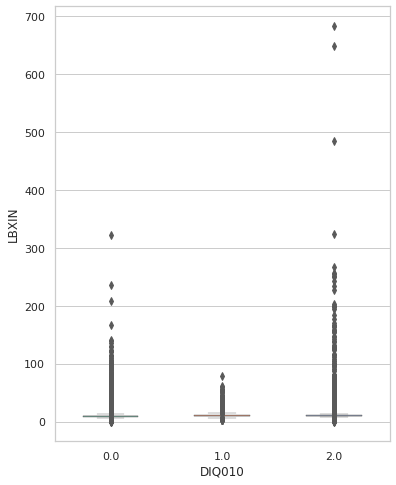

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['DIQ010'], y=df["LBXIN"], palette="Set2", linewidth=0.4, width=0.5)

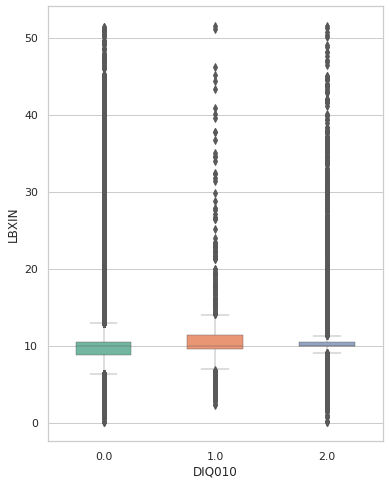

In [ ]:
Delete_in = df[df['LBXIN'] <= df['LBXIN'].quantile(0.01) ].index
Delete_in2 = df[df['LBXIN'] >= df['LBXIN'].quantile(0.99)].index
df_v3 = df.drop(Delete_in)
df_v3 = df.drop(Delete_in2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['DIQ010'], y=df_v3["LBXIN"], palette="Set2", linewidth=0.4, width=0.5)

###LBXGLU

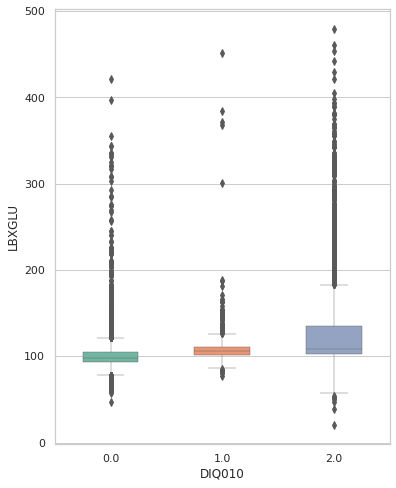

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['DIQ010'], y=df["LBXGLU"], palette="Set2", linewidth=0.4, width=0.5)

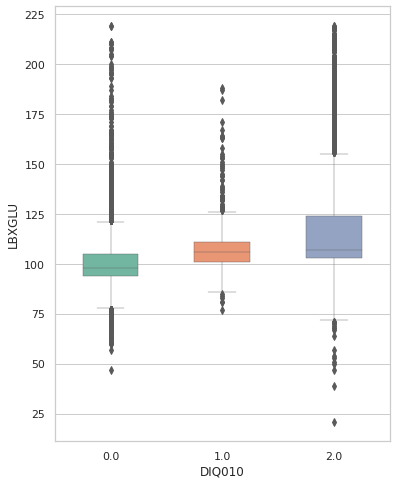

In [ ]:
Delete_in = df[df['LBXGLU'] <= df['LBXGLU'].quantile(0.01) ].index
Delete_in2 = df[df['LBXGLU'] >= df['LBXGLU'].quantile(0.99)].index
df_v3 = df.drop(Delete_in)
df_v3 = df.drop(Delete_in2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['DIQ010'], y=df_v3["LBXGLU"], palette="Set2", linewidth=0.4, width=0.5)

###BMXBMI

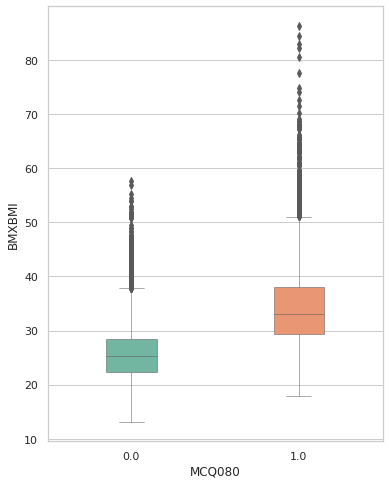

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['MCQ080'], y=df["BMXBMI"], palette="Set2", linewidth=0.5, width=0.3)

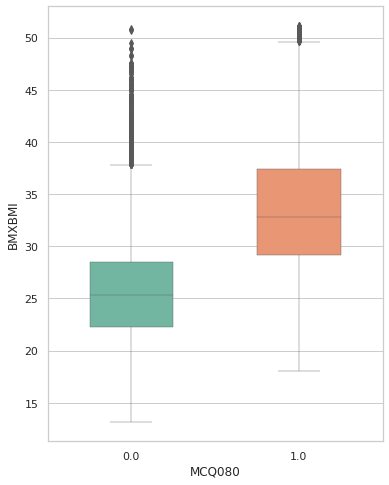

In [ ]:
Delete_bmi = df[df['BMXBMI'] <= df['BMXBMI'].quantile(0.01) ].index
Delete_bmi2 = df[df['BMXBMI'] >= df['BMXBMI'].quantile(0.99)].index
df_v3 = df.drop(Delete_bmi)
df_v3 = df.drop(Delete_bmi2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['MCQ080'], y=df_v3["BMXBMI"], palette="Set2", linewidth=0.4, width=0.5)


###BPXSY1

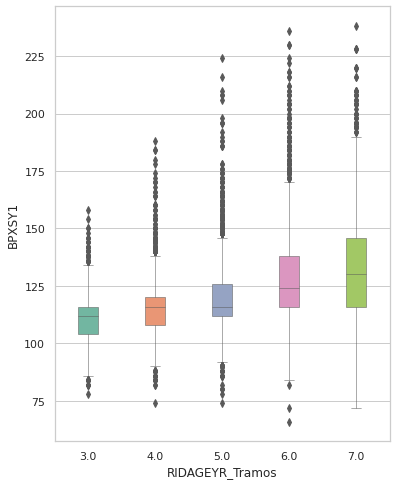

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['RIDAGEYR_Tramos'], y=df["BPXSY1"], palette="Set2", linewidth=0.5, width=0.3)

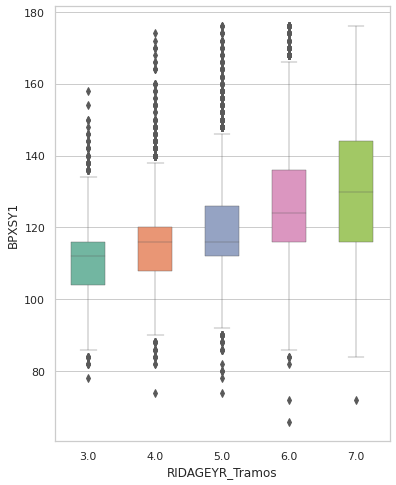

In [ ]:
Delete_sy = df[df['BPXSY1'] <= df['BPXSY1'].quantile(0.01) ].index
Delete_sy2 = df[df['BPXSY1'] >= df['BPXSY1'].quantile(0.99)].index
df_v3 = df.drop(Delete_sy)
df_v3 = df.drop(Delete_sy2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['RIDAGEYR_Tramos'], y=df_v3["BPXSY1"], palette="Set2", linewidth=0.4, width=0.5)

###BPXDI1

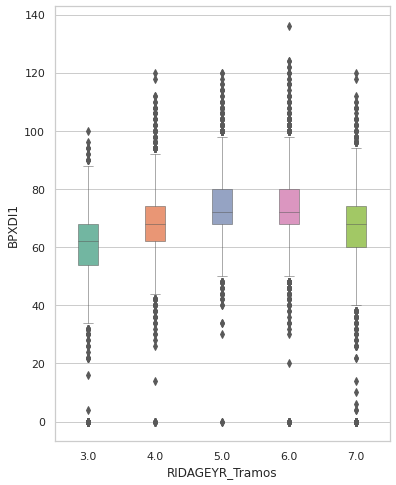

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['RIDAGEYR_Tramos'], y=df["BPXDI1"], palette="Set2", linewidth=0.5, width=0.3)

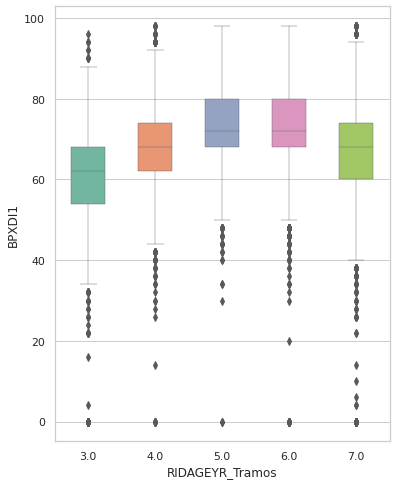

In [ ]:
Deletedi = df[df['BPXDI1'] <= df['BPXDI1'].quantile(0.01) ].index
Deletedi2 = df[df['BPXDI1'] >= df['BPXDI1'].quantile(0.99)].index
df_v3 = df.drop(Deletedi)
df_v3 = df.drop(Deletedi2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['RIDAGEYR_Tramos'], y=df_v3["BPXDI1"], palette="Set2", linewidth=0.4, width=0.5)

###LBXTR

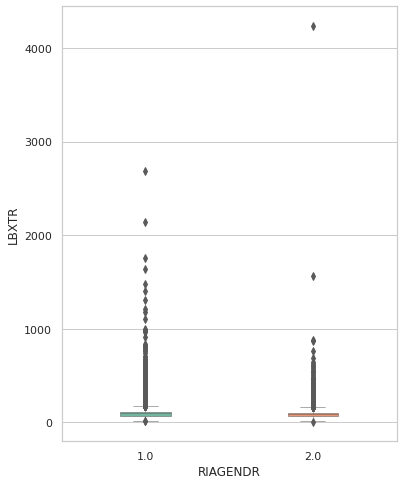

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['RIAGENDR'], y=df["LBXTR"], palette="Set2", linewidth=0.5, width=0.3)

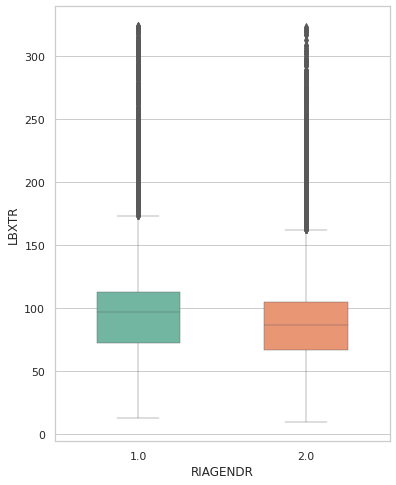

In [ ]:
Delete_tr = df[df['LBXTR'] <= df['LBXTR'].quantile(0.01) ].index
Delete_tr2 = df[df['LBXTR'] >= df['LBXTR'].quantile(0.99)].index
df_v3 = df.drop(Delete_tr)
df_v3 = df.drop(Delete_tr2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['RIAGENDR'], y=df_v3["LBXTR"], palette="Set2", linewidth=0.4, width=0.5)

###LBHDD

In [ ]:
df['LBXTR'].describe()

count    27148.000000
mean        99.533207
std         67.539680
min         10.000000
25%         70.000000
50%         93.000000
75%        106.000000
max       4233.000000
Name: LBXTR, dtype: float64

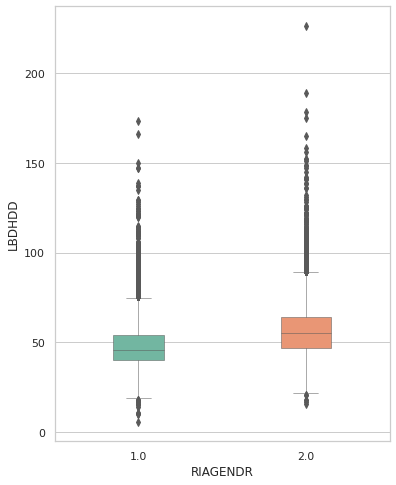

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df['RIAGENDR'], y=df["LBDHDD"], palette="Set2", linewidth=0.5, width=0.3)

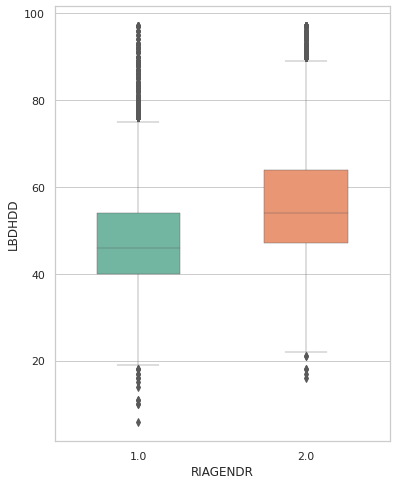

In [ ]:
Delete_hdd = df[df['LBDHDD'] <= df['LBDHDD'].quantile(0.01) ].index
Delete_hdd2 = df[df['LBDHDD'] >= df['LBDHDD'].quantile(0.99)].index
df_v3 = df.drop(Delete_hdd)
df_v3 = df.drop(Delete_hdd2)

#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, x=df_v3['RIAGENDR'], y=df_v3["LBDHDD"], palette="Set2", linewidth=0.4, width=0.5)

##Boxplot para deteccion de outliers


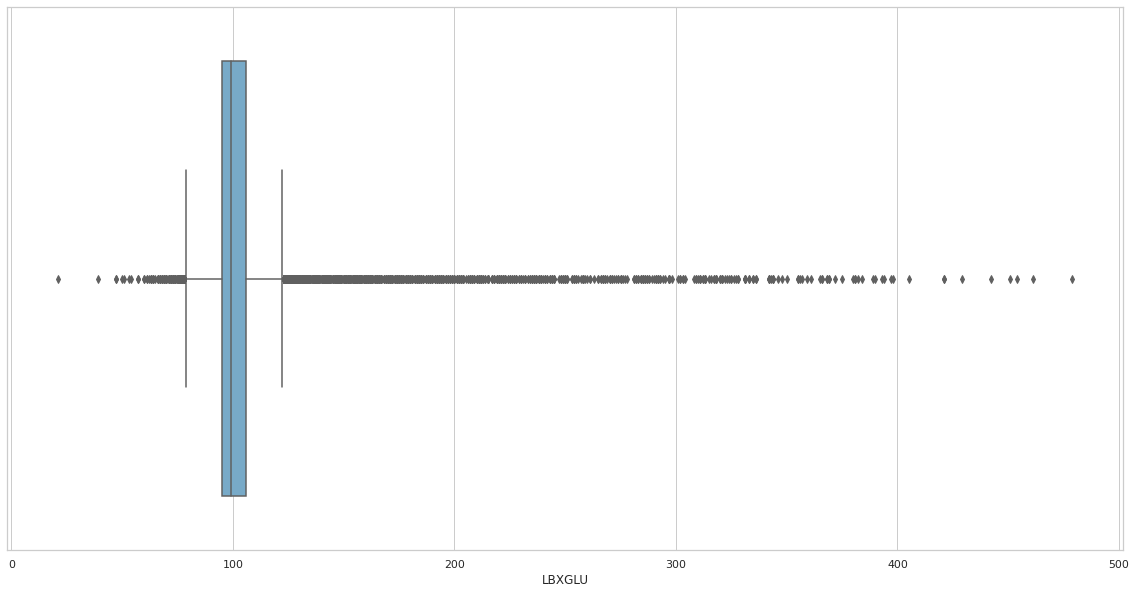

In [ ]:
#LBXGLU
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["LBXGLU"], palette="Blues")

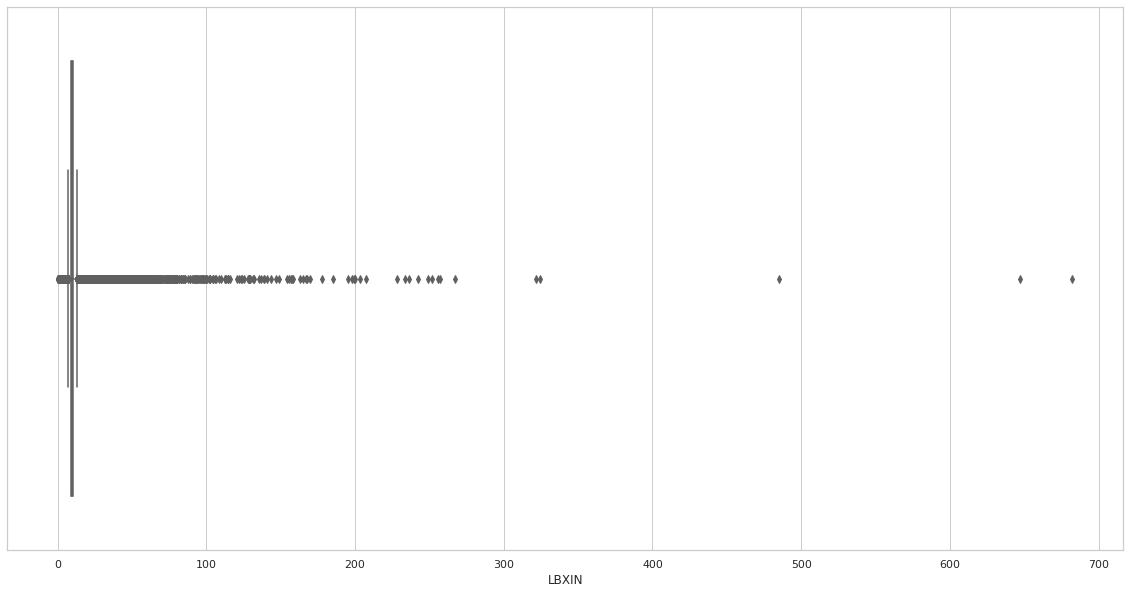

In [ ]:
#LBXIN
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["LBXIN"], palette="Blues")

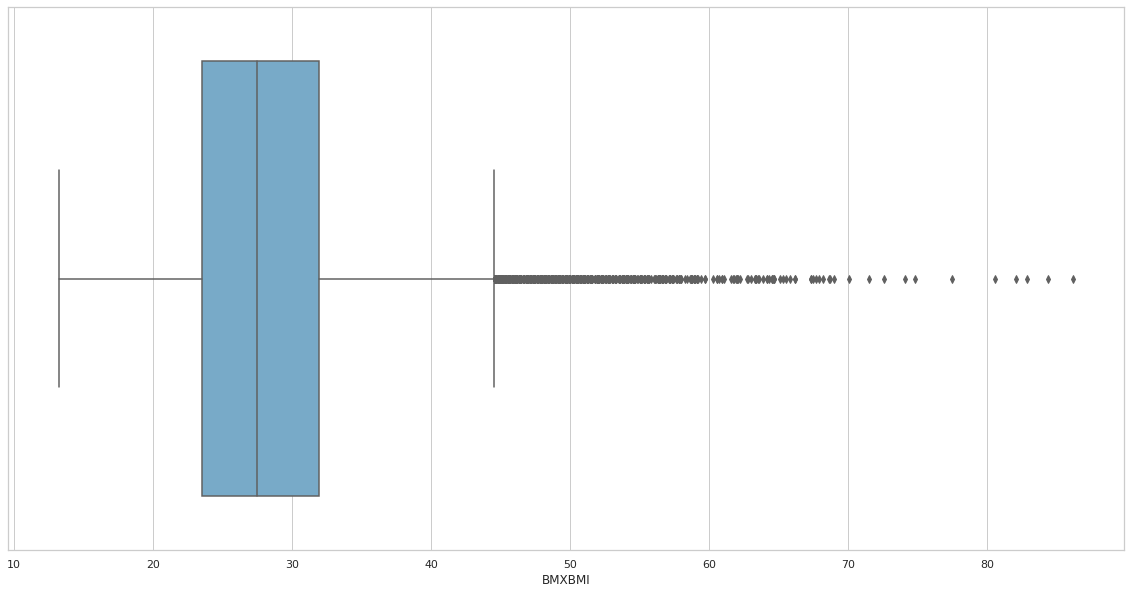

In [ ]:
#BMXBMI
#IMC
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["BMXBMI"], palette="Blues")


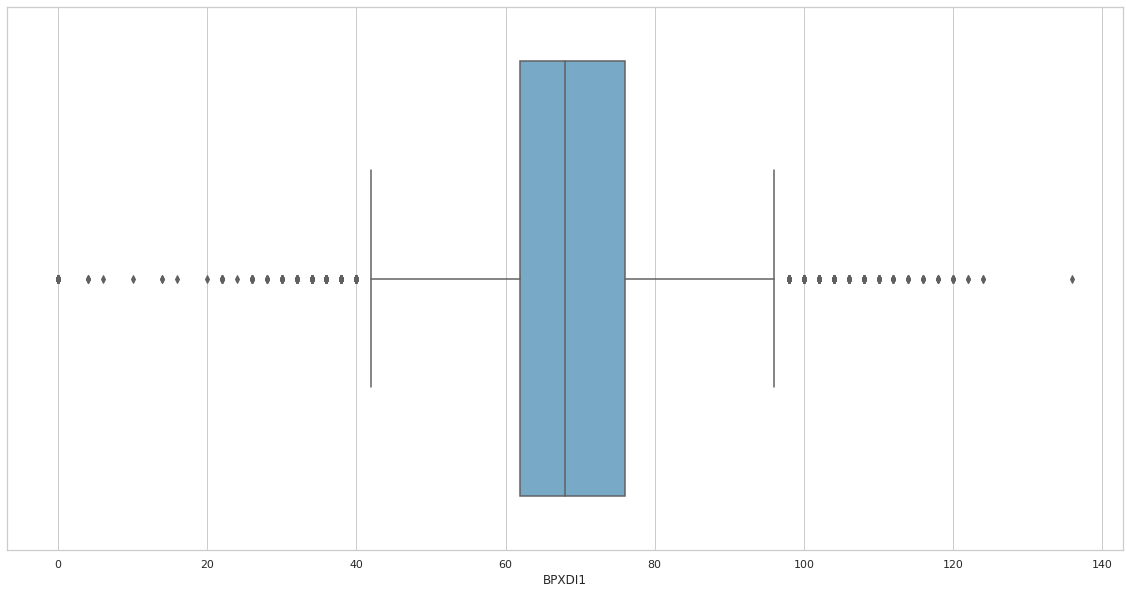

In [ ]:
#BPXDI1
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["BPXDI1"], palette="Blues")

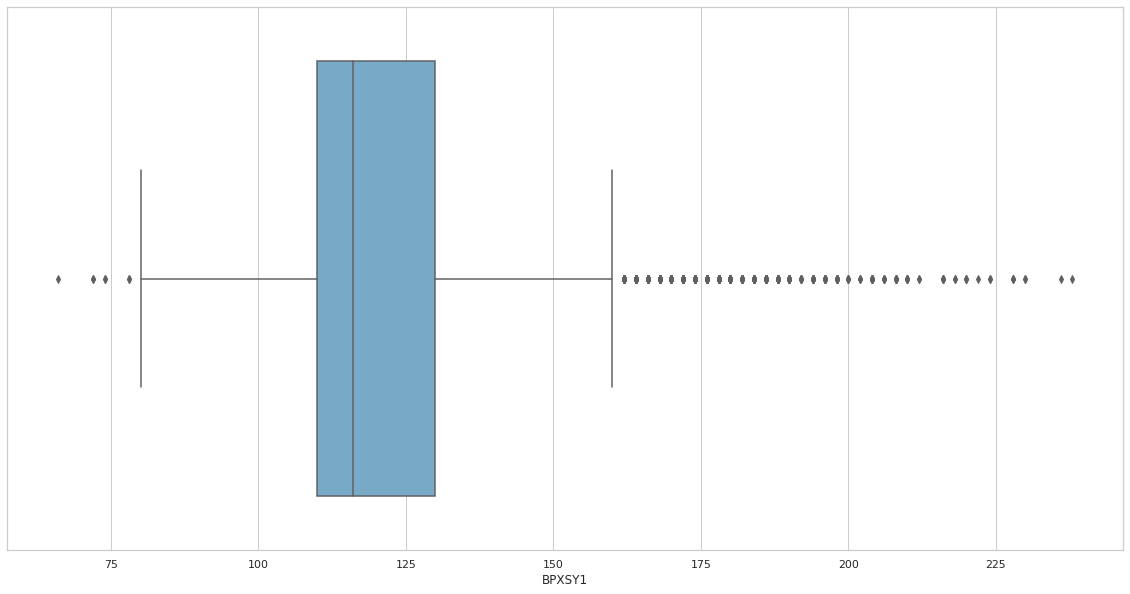

In [ ]:
#BPXSY1
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["BPXSY1"], palette="Blues")

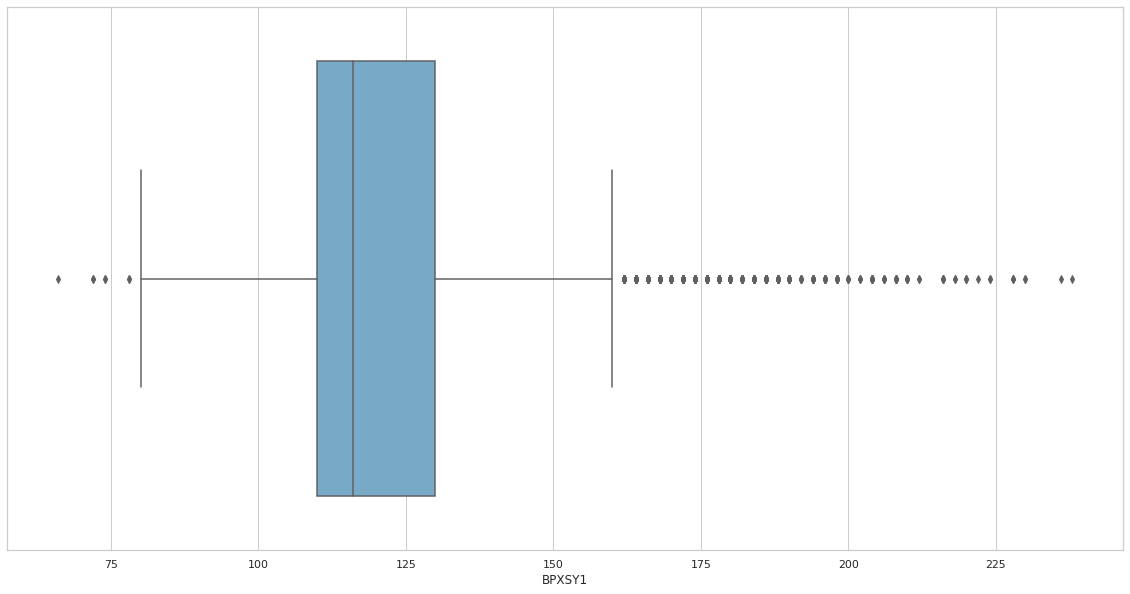

In [ ]:
#BPXSY1
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["BPXSY1"], palette="Blues")

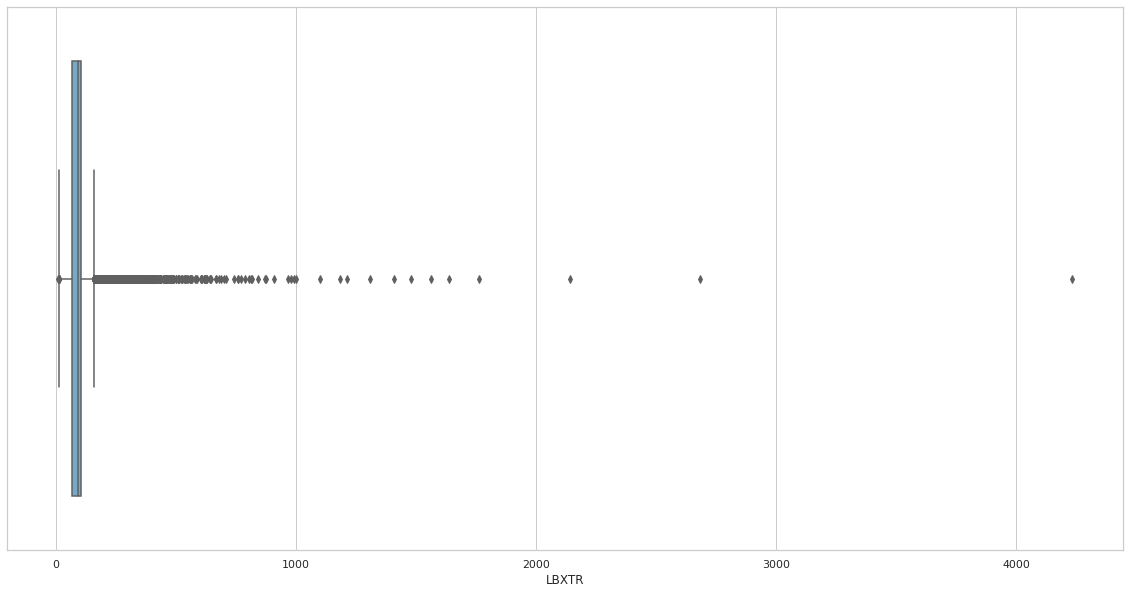

In [ ]:
#LBXTR
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["LBXTR"], palette="Blues")

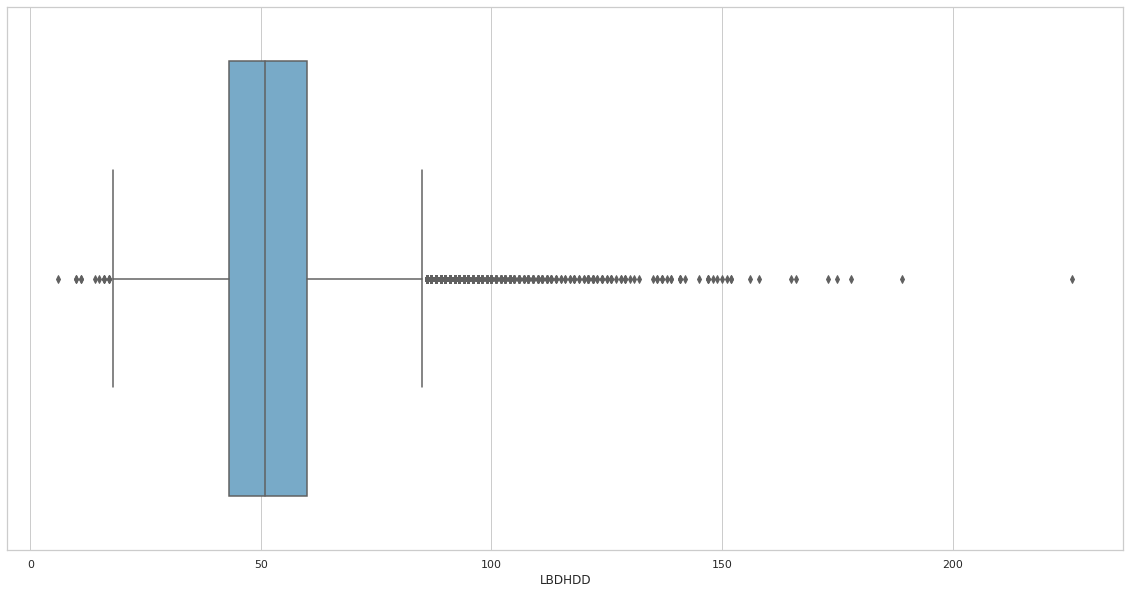

In [ ]:
#LBDHDD
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["LBDHDD"], palette="Blues")

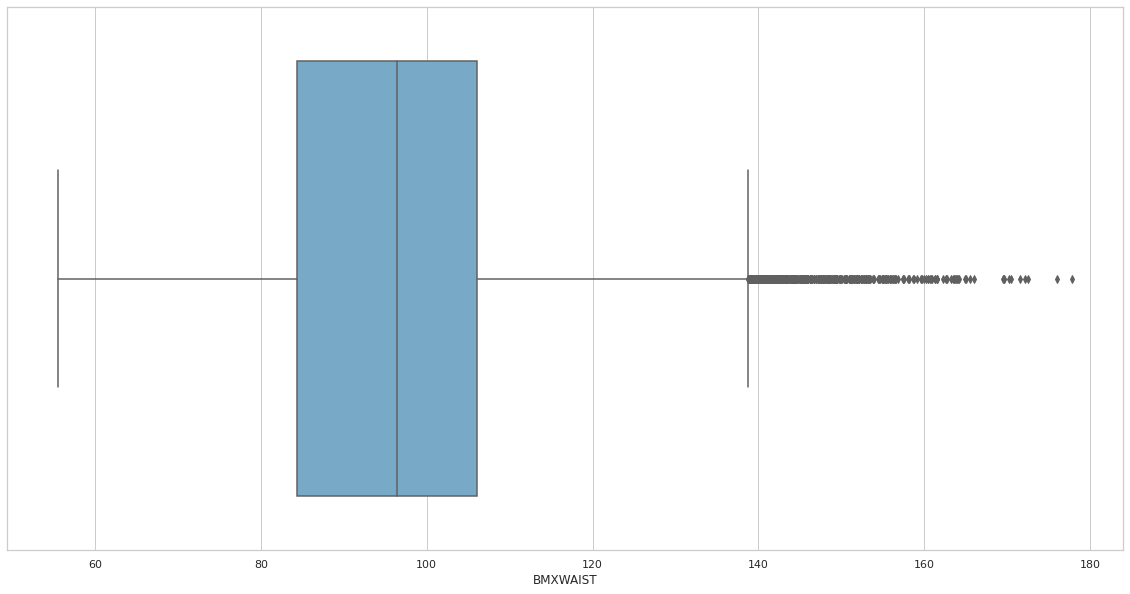

In [ ]:
#BMXWAIST
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, orient = 'h', x=df["BMXWAIST"], palette="Blues")

In [ ]:
df_v3['BMXBMI'].describe()


count    26865.000000
mean        28.503432
std          7.069902
min         13.200000
25%         23.500000
50%         27.600000
75%         31.900000
max         86.200000
Name: BMXBMI, dtype: float64

##ELIMINAR OUTLIERS

In [ ]:
#BORRAR OUTLIERS
Delete_bmi = df[df['BMXBMI'] <= df['BMXBMI'].quantile(0.01) ].index
Delete_bmi2 = df[df['BMXBMI'] >= df['BMXBMI'].quantile(0.99)].index
Delete_di = df[df['BPXDI1'] <= df['BPXDI1'].quantile(0.01) ].index
Delete_di2 = df[df['BPXDI1'] >= df['BPXDI1'].quantile(0.99)].index
Delete_in = df[df['LBXIN'] <= df['LBXIN'].quantile(0.01) ].index
Delete_in2 = df[df['LBXIN'] >= df['LBXIN'].quantile(0.99)].index
Delete_glu = df[df['LBXGLU'] <= df['LBXGLU'].quantile(0.01) ].index
Delete_glu2 = df[df['LBXGLU'] >= df['LBXGLU'].quantile(0.99)].index
Delete_tr = df[df['LBXTR'] <= df['LBXTR'].quantile(0.01) ].index
Delete_tr2 = df[df['LBXTR'] >= df['LBXTR'].quantile(0.99)].index
Delete_hdd = df[df['LBDHDD'] <= df['LBDHDD'].quantile(0.01) ].index
Delete_hdd2 = df[df['LBDHDD'] >= df['LBDHDD'].quantile(0.99)].index
df_v3 = df.drop(Delete_glu)
df_v3 = df.drop(Delete_glu2)
df_v3 = df.drop(Delete_in)
df_v3 = df.drop(Delete_in2)
df_v3 = df.drop(Delete_di)
df_v3 = df.drop(Delete_di2)
df_v3 = df.drop(Delete_bmi)
df_v3 = df.drop(Delete_bmi2)
df_v3 = df.drop(Delete_tr)
df_v3 = df.drop(Delete_tr2)
df_v3 = df.drop(Delete_hdd)
df_v3 = df.drop(Delete_hdd2)


In [ ]:
df.shape

(27148, 59)

In [ ]:
df_v3.shape

(26845, 59)

In [ ]:
df_v3.to_csv('df_v3sinoutliersMS.csv')

In [ ]:
df['LBXTR'].describe()

count    27148.000000
mean        99.533207
std         67.539680
min         10.000000
25%         70.000000
50%         93.000000
75%        106.000000
max       4233.000000
Name: LBXTR, dtype: float64

##ONE HOT ENCODING

In [ ]:
df

,SEQN,DIQ010,DIQ070,INQ020,INDFMMPI,INDFMMPC,BPXSY1,BPXDI1,BMXWT,BMXHT,...,Etnia_7.0,WHI,ALQ130_Tramos,REQ1,REQ2,REQ3,REQ4,REQ5,REQ_SUM,MET_SYM
0,62161,0.0,2.0,1.0,2.10,3.0,110.0,82.0,69.2,172.3,...,0,0.470110,1.0,0,0,0,0,0,0,0
2,62163,0.0,2.0,1.0,5.00,3.0,112.0,38.0,49.4,168.9,...,0,0.382475,1.0,0,0,0,0,0,0,0
3,62164,0.0,2.0,1.0,1.11,1.0,116.0,56.0,67.2,170.1,...,0,0.470899,1.0,0,0,1,0,0,1,0
4,62165,0.0,2.0,0.0,0.50,1.0,110.0,64.0,69.1,159.4,...,0,0.543915,1.0,0,0,0,0,0,0,0
7,62169,0.0,2.0,0.0,0.38,1.0,124.0,80.0,54.6,164.8,...,0,0.422330,1.0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37601,102952,2.0,1.0,0.0,0.95,1.0,136.0,74.0,49.0,156.5,...,0,0.525240,1.0,0,0,0,1,1,2,0
37602,102953,0.0,2.0,1.0,2.10,3.0,124.0,76.0,97.4,164.9,...,0,0.696180,4.0,1,0,0,0,1,2,0
37603,102954,0.0,2.0,1.0,5.00,3.0,116.0,66.0,69.1,162.6,...,0,0.531365,1.0,0,0,0,0,0,0,0
37604,102955,0.0,2.0,1.0,2.44,3.0,114.0,62.0,111.9,156.6,...,0,0.724777,1.0,1,0,1,0,0,2,0


In [ ]:
import scipy.stats as stats
insulina = df['LBXIN']
len(stats.zscore(insulina))

27148

In [ ]:
df.isna().sum()

SEQN               0
DIQ010             0
DIQ070             0
INQ020             0
INDFMMPI           0
INDFMMPC           0
BPXSY1             0
BPXDI1             0
BMXWT              0
BMXHT              0
BMXBMI             0
BMXWAIST           0
BPQ030             0
BPQ040A            0
BPQ050A            0
BPQ090D            0
LBXGLU             0
LBXIN              0
MCQ010             0
MCQ080             0
MCQ220             0
MCQ300C            0
HIQ011             0
LBDHDD             0
SMQ020             0
LBXTR              0
RIAGENDR           0
RIDAGEYR           0
RIDRETH3           0
DMDEDUC2           0
PAQ605             0
PAQ620             0
PAQ635             0
PAQ650             0
PAQ665             0
HSD010             0
ALQ130             0
DBQ700             0
SLQ050             0
DPQ020             0
DPQ030             0
DPQ040             0
DPQ050             0
RIDAGEYR_Tramos    0
Etnia_1.0          0
Etnia_2.0          0
Etnia_3.0          0
Etnia_4.0    

In [ ]:
stats.zscore(insulina)

array([ 0.55108879, -0.1540952 , -0.65121815, ..., -0.17633073,
       -0.01750551,  7.46633898])

In [ ]:
df.apply(stats.zscore)

,SEQN,DIQ010,DIQ070,INQ020,INDFMMPI,INDFMMPC,BPXSY1,BPXDI1,BMXWT,BMXHT,...,Etnia_7.0,WHI,ALQ130_Tramos,REQ1,REQ2,REQ3,REQ4,REQ5,REQ_SUM,MET_SYM
0,-1.769217,-0.403182,0.314887,0.542042,-0.067424,0.913287,-0.659605,1.043448,-0.459824,0.582017,...,-0.204816,-1.097618,-0.304337,-1.009772,-0.614704,-0.957510,-0.795651,-1.011410,-1.297024,-0.840509
2,-1.769048,-0.403182,0.314887,0.542042,1.951005,0.913287,-0.545507,-2.441204,-1.368043,0.237614,...,-0.204816,-1.960177,-0.304337,-1.009772,-0.614704,-0.957510,-0.795651,-1.011410,-1.297024,-0.840509
3,-1.768964,-0.403182,0.314887,0.542042,-0.756473,-1.275344,-0.317312,-1.015665,-0.551564,0.359168,...,-0.204816,-1.089850,-0.304337,-1.009772,-0.614704,1.044375,-0.795651,-1.011410,-0.693961,-0.840509
4,-1.768880,-0.403182,0.314887,-1.844876,-1.181040,-1.275344,-0.659605,-0.382091,-0.464411,-0.724688,...,-0.204816,-0.371192,-0.304337,-1.009772,-0.614704,-0.957510,-0.795651,-1.011410,-1.297024,-0.840509
7,-1.768542,-0.403182,0.314887,-1.844876,-1.264561,-1.275344,0.139079,0.885055,-1.129521,-0.177695,...,-0.204816,-1.567898,-0.304337,-1.009772,-0.614704,-0.957510,-0.795651,0.988718,-0.693961,-0.840509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37601,1.672116,2.480270,-3.175743,-1.844876,-0.867835,-1.275344,0.823666,0.409875,-1.386391,-1.018443,...,-0.204816,-0.555002,-0.304337,-1.009772,-0.614704,-0.957510,1.256832,0.988718,-0.090899,-0.840509
37602,1.672201,-0.403182,0.314887,0.542042,-0.067424,0.913287,0.139079,0.568268,0.833699,-0.167566,...,-0.204816,1.127487,5.785687,0.990322,-0.614704,-0.957510,-0.795651,0.988718,-0.090899,-0.840509
37603,1.672285,-0.403182,0.314887,0.542042,1.951005,0.913287,-0.317312,-0.223698,-0.464411,-0.400544,...,-0.204816,-0.494710,-0.304337,-1.009772,-0.614704,-0.957510,-0.795651,-1.011410,-1.297024,-0.840509
37604,1.672370,-0.403182,0.314887,0.542042,0.169220,0.913287,-0.431410,-0.540485,1.498809,-1.008314,...,-0.204816,1.408956,-0.304337,0.990322,-0.614704,1.044375,-0.795651,-1.011410,-0.090899,-0.840509


In [ ]:
df['LBXGLU'].quantile(0.99)

220.0

In [ ]:
df['LBXGLU'].quantile(0.01)

80.0

In [ ]:
df_v3['BMXBMI'].describe()

count    26876.000000
mean        28.170036
std          6.449744
min         13.200000
25%         23.500000
50%         27.400000
75%         31.700000
max         51.100000
Name: BMXBMI, dtype: float64

In [ ]:
#BORRAR OUTLIERS
Delete_bmi = df[df['BMXBMI'] <= df['BMXBMI'].quantile(0.01) ].index
Delete_bmi2 = df[df['BMXBMI'] >= df['BMXBMI'].quantile(0.99)].index
Delete_di = df[df['BPXDI1'] <= df['BPXDI1'].quantile(0.01) ].index
Delete_di2 = df[df['BPXDI1'] >= df['BPXDI1'].quantile(0.99)].index
Delete_in = df[df['LBXIN'] <= df['LBXIN'].quantile(0.01) ].index
Delete_in2 = df[df['LBXIN'] >= df['LBXIN'].quantile(0.99)].index
Delete_glu = df[df['LBXGLU'] <= df['LBXGLU'].quantile(0.01) ].index
Delete_glu2 = df[df['LBXGLU'] >= df['LBXGLU'].quantile(0.99)].index
Delete_sy = df[df['BPXSY1'] <= df['BPXSY1'].quantile(0.01) ].index
Delete_sy2 = df[df['BPXSY1'] >= df['BPXSY1'].quantile(0.99)].index
df_v3 = df.drop(Delete_glu)
df_v3 = df.drop(Delete_glu2)
df_v3 = df.drop(Delete_in)
df_v3 = df.drop(Delete_in2)
df_v3 = df.drop(Delete_di)
df_v3 = df.drop(Delete_di2)
df_v3 = df.drop(Delete_bmi)
df_v3 = df.drop(Delete_bmi2)
df_v3 = df.drop(Delete_sy)
df_v3 = df.drop(Delete_sy2)

In [ ]:
df_v3['BMXBMI'].describe()

count    26845.000000
mean        28.462703
std          7.063674
min         13.200000
25%         23.500000
50%         27.500000
75%         31.900000
max         86.200000
Name: BMXBMI, dtype: float64

In [ ]:
df_v3.to_csv('df_v3.csv')

In [ ]:
df_v3.isna().sum()

SEQN               0
DIQ010             0
DIQ070             0
INQ020             0
INDFMMPI           0
INDFMMPC           0
BPXSY1             0
BPXDI1             0
BMXWT              0
BMXHT              0
BMXBMI             0
BMXWAIST           0
BPQ030             0
BPQ040A            0
BPQ050A            0
BPQ090D            0
LBXGLU             0
LBXIN              0
MCQ010             0
MCQ080             0
MCQ220             0
MCQ300C            0
HIQ011             0
LBDHDD             0
SMQ020             0
LBXTR              0
RIAGENDR           0
RIDAGEYR           0
RIDRETH3           0
DMDEDUC2           0
PAQ605             0
PAQ620             0
PAQ635             0
PAQ650             0
PAQ665             0
HSD010             0
ALQ130             0
DBQ700             0
SLQ050             0
DPQ020             0
DPQ030             0
DPQ040             0
DPQ050             0
RIDAGEYR_Tramos    0
Etnia_1.0          0
Etnia_2.0          0
Etnia_3.0          0
Etnia_4.0    

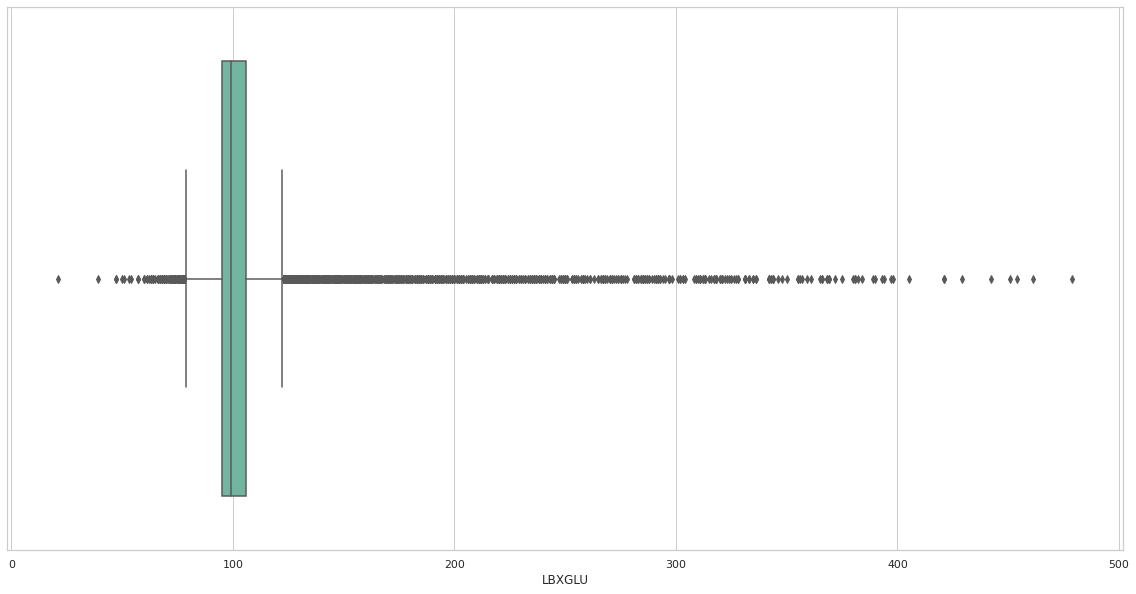

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 10))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df_v3, orient = 'h', x=df["LBXGLU"], palette="Set2")

In [ ]:
df_v3 = df_v3.drop(['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'MET_SYM'], axis = 1)

In [ ]:
df_v3.isna().sum()

SEQN               0
DIQ010             0
DIQ070             0
INQ020             0
INDFMMPI           0
INDFMMPC           0
BPXSY1             0
BPXDI1             0
BMXWT              0
BMXHT              0
BMXBMI             0
BMXWAIST           0
BPQ030             0
BPQ040A            0
BPQ050A            0
BPQ090D            0
LBXGLU             0
LBXIN              0
MCQ010             0
MCQ080             0
MCQ220             0
MCQ300C            0
HIQ011             0
LBDHDD             0
SMQ020             0
LBXTR              0
RIAGENDR           0
RIDAGEYR           0
RIDRETH3           0
DMDEDUC2           0
PAQ605             0
PAQ620             0
PAQ635             0
PAQ650             0
PAQ665             0
HSD010             0
ALQ130             0
DBQ700             0
SLQ050             0
DPQ020             0
DPQ030             0
DPQ040             0
DPQ050             0
RIDAGEYR_Tramos    0
Etnia_1.0          0
Etnia_2.0          0
Etnia_3.0          0
Etnia_4.0    

##PREVALENCIA SM


In [ ]:
df = df_v3
df.shape

(26845, 52)

In [ ]:
#CONDICIONES DE SINDROME METABOLICO
#CONDICIONES Y AÑADIR FILAS DE REQUISITOS

#CONDICION REQUISITO 1

condiciones_REQ1 = [((df['RIAGENDR'] == 2) & (df['BMXWAIST']>= 102)) | ((df['RIAGENDR'] == 1) & (df['BMXWAIST']>= 88)),
                     ((df['RIAGENDR'] == 2) & (df['BMXWAIST']< 102)) | ((df['RIAGENDR'] == 1) & (df['BMXWAIST']< 88)),
                    ]
                                                  
opciones_REQ1 = [1, 0]

df['REQ1'] = np.select(condiciones_REQ1, opciones_REQ1)


#CONDICION REQUISITO 2

condiciones_REQ2 = [(df['LBXTR'] >= 150) | (df['BPQ090D'] == 1),
                     (df['LBXTR'] < 150) | (df['BPQ090D'] == 2) 
                    ]
                                                  
opciones_REQ2 = [1, 0]

df['REQ2'] = np.select(condiciones_REQ2, opciones_REQ2)

#CONDICION REQUISITO 3

condiciones_REQ3 = [((df['RIAGENDR'] == 2) & (df['LBDHDD']<= 50 )) | ((df['RIAGENDR'] == 1) & (df['LBDHDD'] <= 40)) | (df['BPQ040A'] == 1) ,
                     ((df['RIAGENDR'] == 2) & (df['LBDHDD']> 50)) | ((df['RIAGENDR'] == 1) & (df['LBDHDD'] > 40)) | (df['BPQ040A'] == 2),
                    ]
                                                  
opciones_REQ3 = [1, 0]

df['REQ3'] = np.select(condiciones_REQ3, opciones_REQ3)



#CONDICION REQUISITO 4


condiciones_REQ4 = [(df['BPXSY1'] >= 130) | (df['BPXDI1'] >= 85) | (df['BPQ050A'] == 1),
                     (df['BPXSY1'] < 130) | (df['BPXDI1'] < 85) | (df['BPQ050A'] == 2)
                    ]
                                                  
opciones_REQ4 = [1, 0]

df['REQ4'] = np.select(condiciones_REQ4, opciones_REQ4)

#CONDICION REQUISITO 5

condiciones_REQ5 = [(df['LBXGLU'] >= 100) | (df['DIQ070'] == 1),
                     (df['LBXGLU'] < 100) | (df['DIQ070'] == 2)
                    ]
                                                  
opciones_REQ5 = [1, 0]

df['REQ5'] = np.select(condiciones_REQ5, opciones_REQ5)

#SUMA DE REQUISITOS POR FILA
df['REQ_SUM'] = df['REQ1'] + df['REQ2'] + df['REQ3'] + df['REQ4'] + df['REQ5']

#ENCODING METSYM 1 ES QUE TIENE Y 0 ES QUE NO
condiciones_METSYM = [(df['REQ_SUM'] >= 3),
                     (df['REQ_SUM'] < 3)
                    ]
                                                  
opciones_METSYM = [1, 0]

df['MET_SYM'] = np.select(condiciones_METSYM, opciones_METSYM)


In [ ]:
#PREVALENCIA EN PORCENTAJE

#porcentaje de los que presentan sindrome metabolico
porcentaje_METSYM_1112 = 100 * df['MET_SYM'].value_counts() / len(df['MET_SYM'])
#conteo de valores
df['MET_SYM'].value_counts()
print("porcentaje SM: ", porcentaje_METSYM_1112)
#df.to_csv('df.csv')

porcentaje SM:  0    59.15068
1    40.84932
Name: MET_SYM, dtype: float64


In [ ]:
df.to_csv('df3_sinoutliersMS.csv')

##Justificación de los outliers

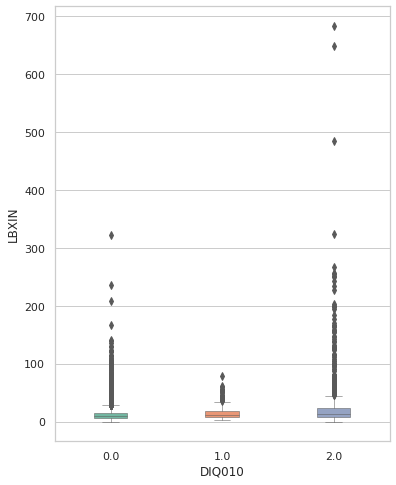

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (6, 8))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df_raw['DIQ010'], y=df_raw["LBXIN"], palette="Set2", linewidth=0.5, width=0.3)

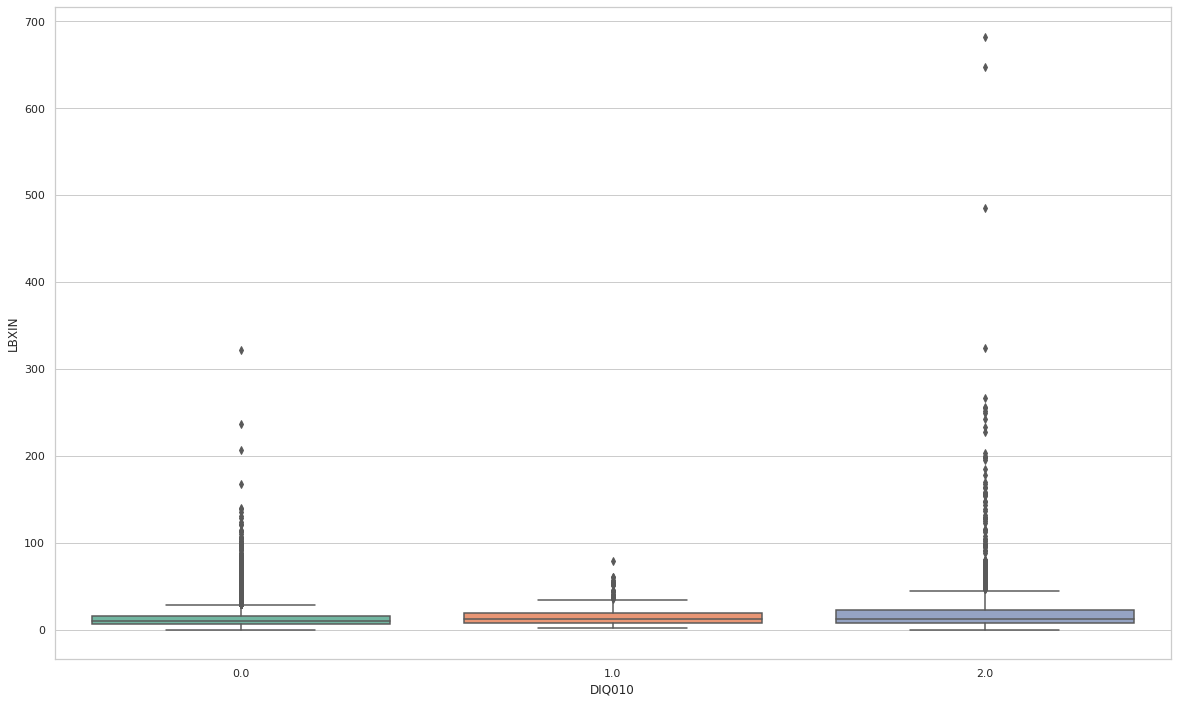

In [ ]:
#PERIMETRO ABDOMINAL
#Presión sanguínea
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (20, 12))
#df = sns.load_dataset("df")
ax = sns.boxplot(data = df, x=df_raw['DIQ010'], y=df_raw["LBXIN"], palette="Set2")

In [ ]:
df_v2.shape

(27148, 59)

In [ ]:
df.shape

(26845, 59)

In [ ]:
df['DIQ010'].unique()

array([0., 2.])

In [ ]:
df_v3['DIQ010'].unique()

array([0., 2.])

In [ ]:
df_raw['DIQ010'].unique()
df_raw['DIQ010'] = df_raw['DIQ010'].fillna(0)

In [ ]:

#Limpieza DIQ010: el doctor te ha dicho que tienes diabetes (0 no 1 BORDERLINE 2 si)
df_raw['DIQ010'] = df_raw['DIQ010'].fillna(0)
df_raw['DIQ010'] = df_raw.DIQ010.replace({9: 0})
df_raw['DIQ010'] = df_raw.DIQ010.replace({7: 0})
df_raw['DIQ010'] = df_raw.DIQ010.replace({2: 0})
df_raw['DIQ010'] = df_raw.DIQ010.replace({1: 2})
df_raw['DIQ010'] = df_raw.DIQ010.replace({3: 1})



In [ ]:
df_raw['DIQ010'].unique()

array([0., 2., 1.])

##Dispersion antes y despues de outliers



In [ ]:
vars = ['LBXIN', 'LBXGLU', 'RIDAGEYR', 'BMXWAIST', 'BMXBMI', 'WHI', 'BPXDI1', 'BPXSY1']
dfo_aux = dfo[vars]
df_aux = df[vars]

In [ ]:
dfo_aux

,LBXIN,LBXGLU,RIDAGEYR,BMXWAIST,BMXBMI,WHI,BPXDI1,BPXSY1
0,18.65,92.0,22.0,81.0,23.3,0.470110,82.0,110.0
1,9.77,97.0,14.0,64.6,17.3,0.382475,38.0,112.0
2,3.51,82.0,44.0,80.1,23.2,0.470899,56.0,116.0
3,15.35,88.0,14.0,86.7,27.2,0.543915,64.0,110.0
4,9.64,107.0,21.0,69.6,20.1,0.422330,80.0,124.0
...,...,...,...,...,...,...,...,...
27143,4.39,158.0,70.0,82.2,20.0,0.525240,74.0,136.0
27144,9.99,102.0,42.0,114.8,35.8,0.696180,76.0,124.0
27145,9.49,94.0,41.0,86.4,26.1,0.531365,66.0,116.0
27146,11.49,93.0,14.0,113.5,45.6,0.724777,62.0,114.0


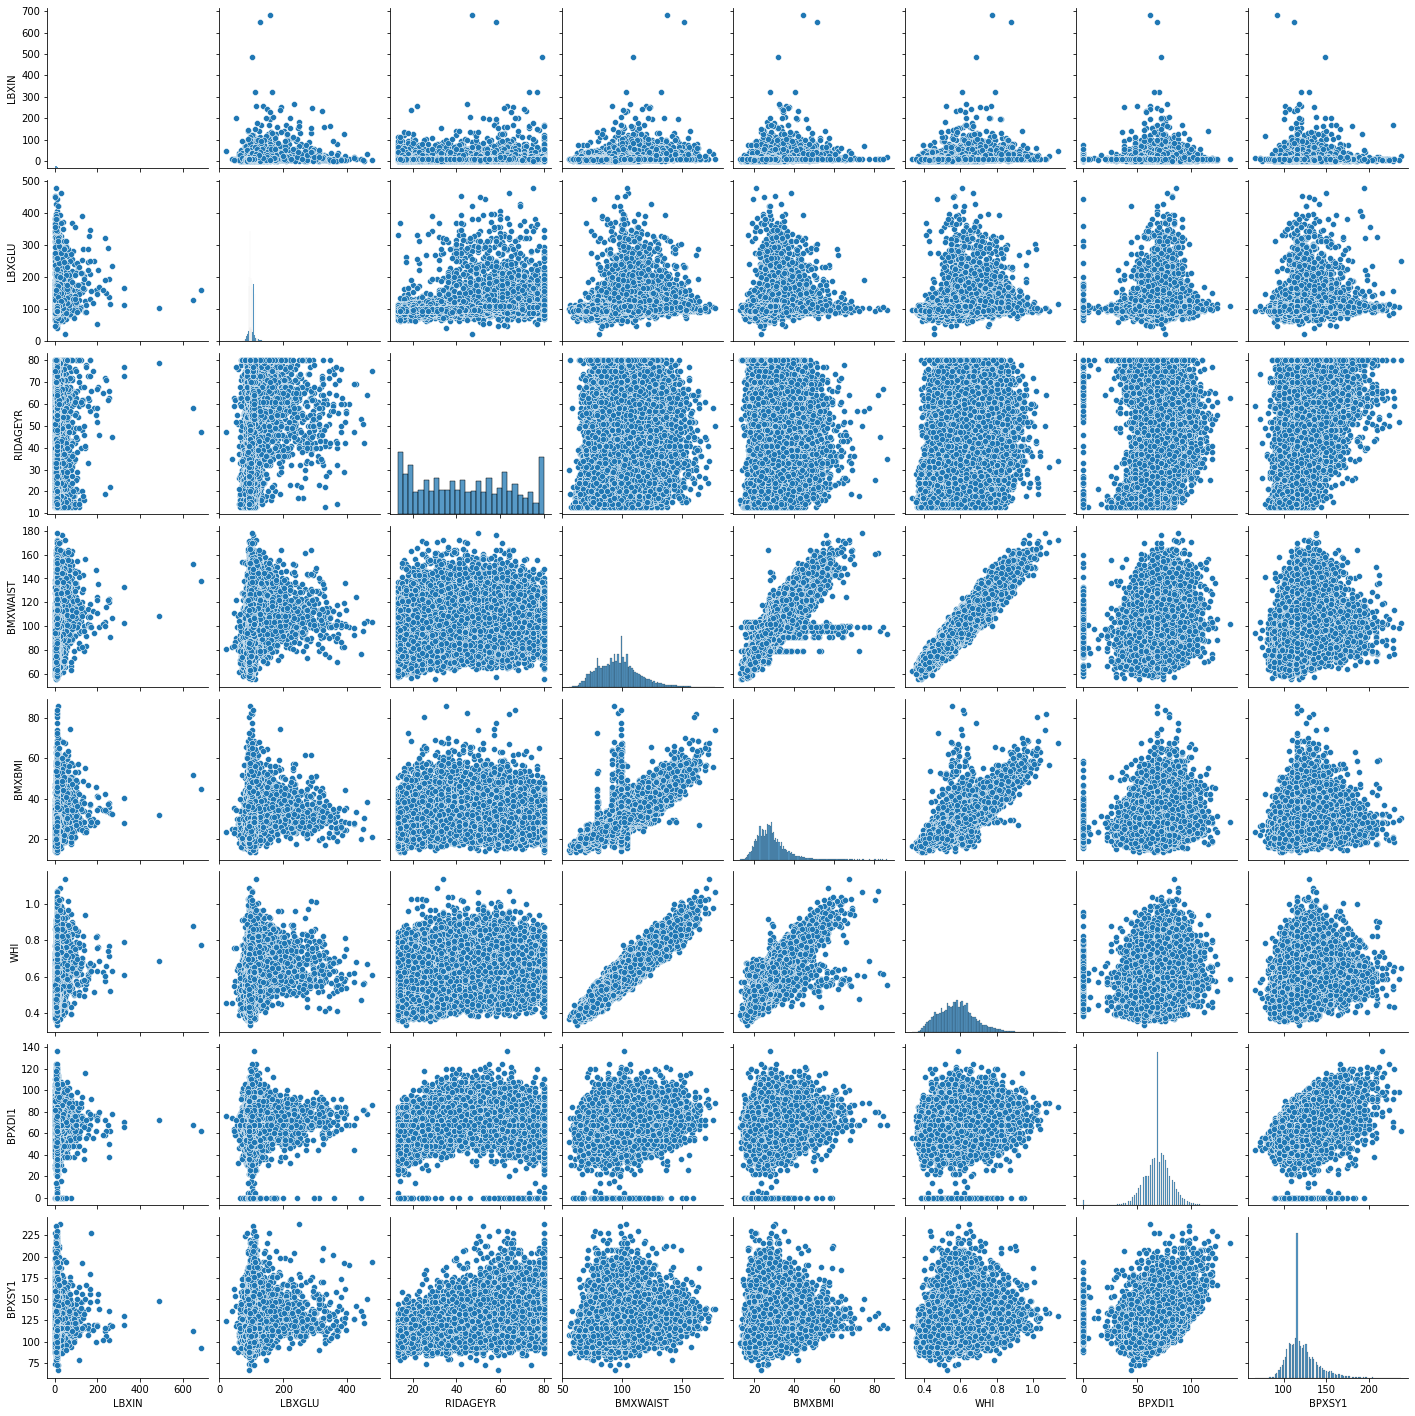

In [ ]:
sns.pairplot(data = dfo_aux)

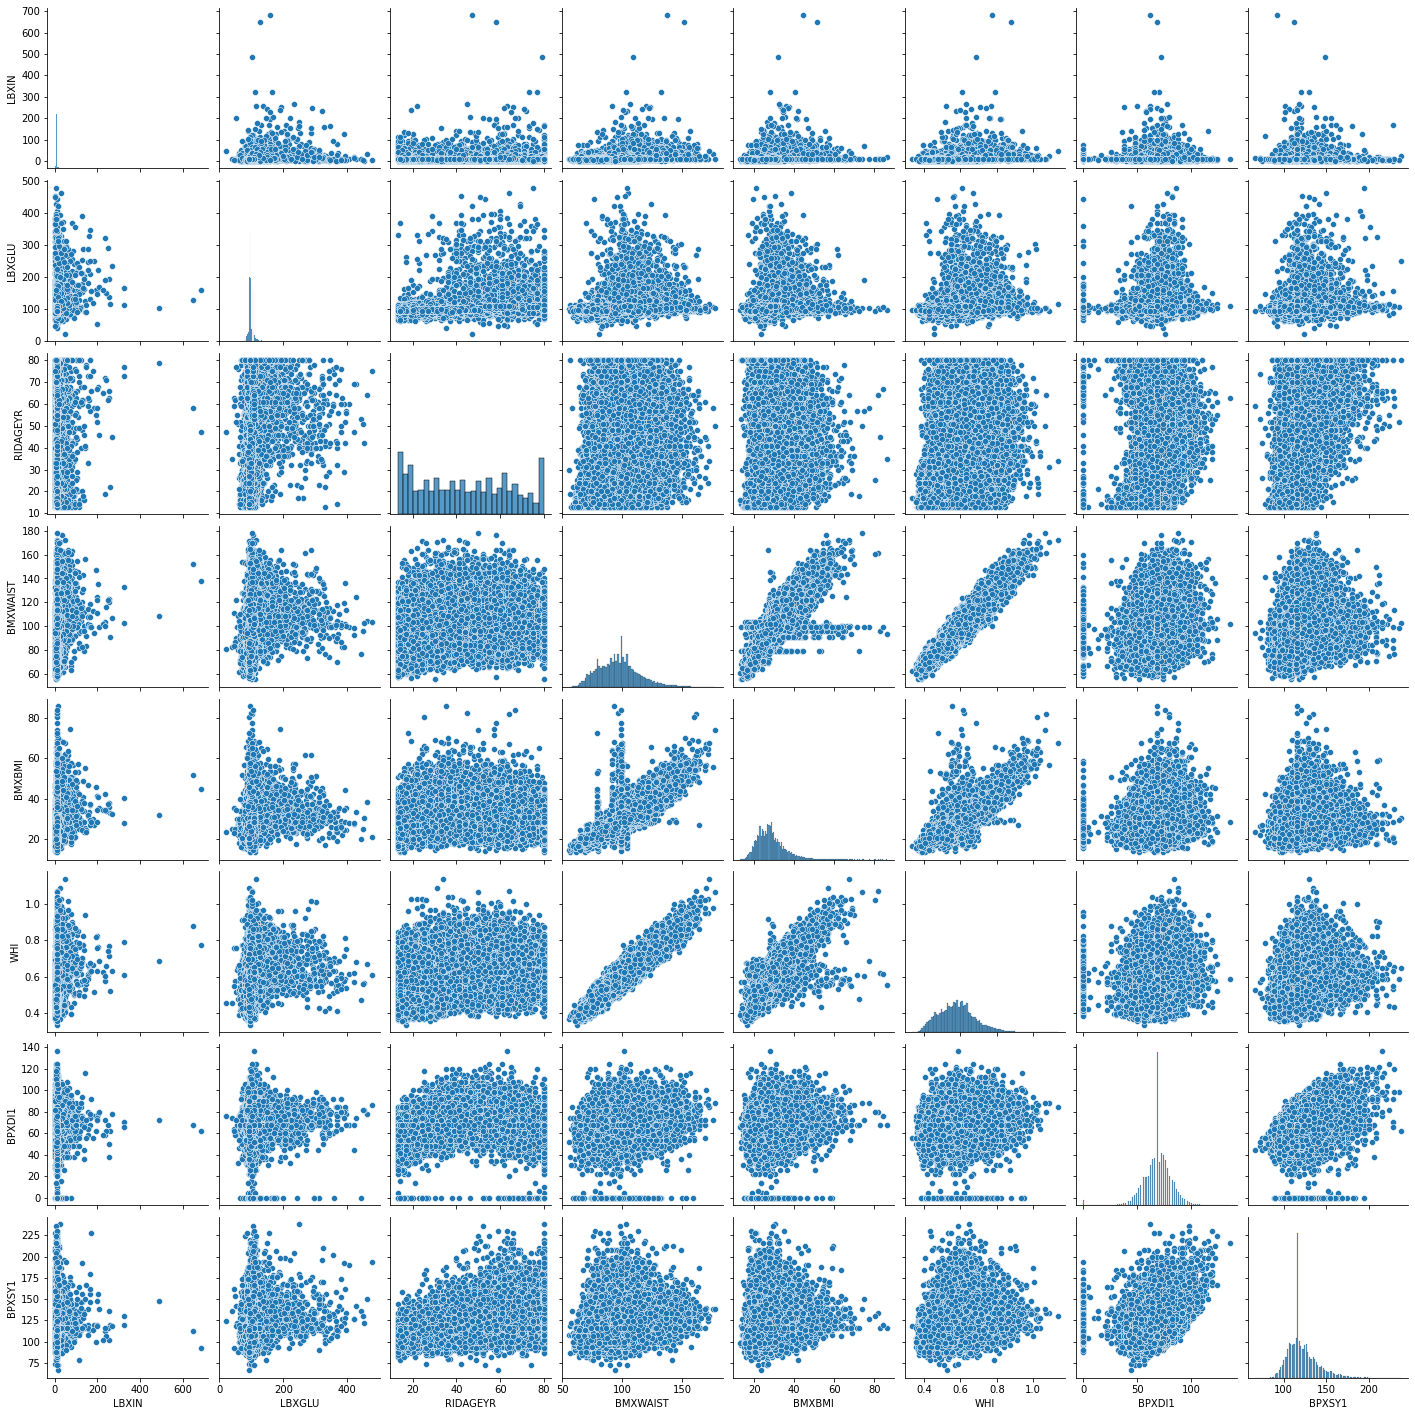

In [ ]:
sns.pairplot(data = df_aux)